# Classical System: SVM

The code below implements a classic SVM used in Neural Networks and machine learning algorithms. It allows for the dynamic classification and regression analysis of data and in this case it is used to classify linear data.

In [ ]:
import numpy as np #standard importing of libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Training data

Like the other algorithms, this implementation also uses a smaller subset of data to train the algorithm which can then be used to analyze the entire data set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train[:4])
print(y_train[:4])
print(X_test[:4])
print(y_test[:4])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]]
[0 1 0 1]
[[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]]
[0 0 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  2]
 [ 8 24]]


0.9

# Results:

Using the training data it is clear to show that the algorithm classified the two different classes in seperate regions with almost 90% accuracy indicating its high effeciency.

<ipython-input-11-3eca44f3a824>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)


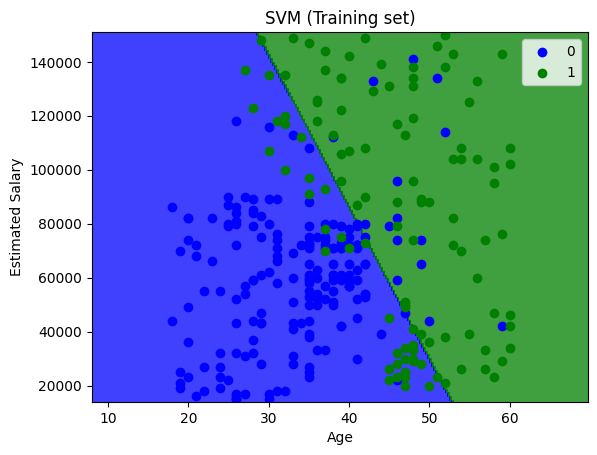

In [ ]:
#Classified data set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# plt.show()
plt.savefig('classical_svm_feature_space.png', dpi=600)

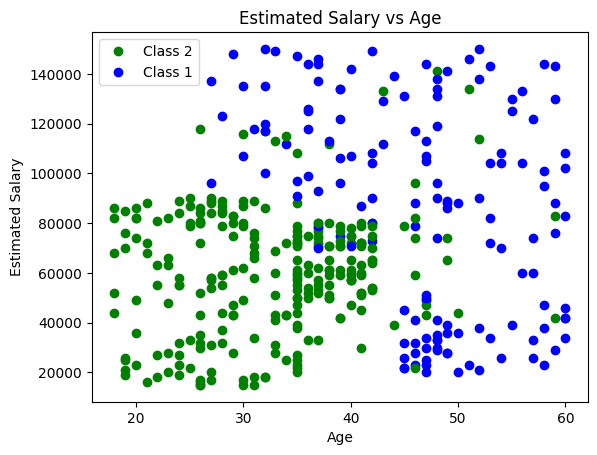

In [ ]:
# Original data set for comparison
for i, data in enumerate(zip(X, y)):
  x_cur, y_target = data
  if i == 0 or i == 7:
    if y_target == 1:
      plt.plot(x_cur[0], x_cur[1], "bo", label='Class 1')
    else:
      plt.plot(x_cur[0], x_cur[1], "go", label='Class 2')
  else:
   if y_target == 1:
        plt.plot(x_cur[0], x_cur[1], "bo")
   else:
        plt.plot(x_cur[0], x_cur[1], "go")

plt.title("Estimated Salary vs Age")
plt.ylabel("Estimated Salary")
plt.xlabel("Age")
plt.legend()
# plt.show()
plt.savefig('qnn_dataset_vis.png', dpi=600)

This is a confusion matrix represention of the data above and shows the accuracy of the data being classifed. The top-left and bottom-right quadrants added shows the correctly marked values which add up to 

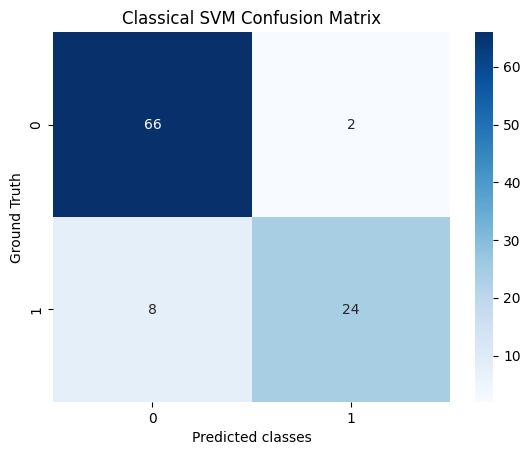

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and ticks
plt.xlabel('Predicted classes')
plt.ylabel('Ground Truth')
plt.title('Classical SVM Confusion Matrix')
# plt.show()
plt.savefig('svm_cm.png', dpi=600)